In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
def get_data(filepath):    
    df = pd.read_csv(filepath, names=['height $\mu m$'], skiprows=500,nrows=5000)
    df.reset_index(inplace=True)
    model = LinearRegression()
    x = np.array(df['index']).reshape((-1, 1))
    y = np.array(df['height $\mu m$'])
    model.fit(x, y)
    consts = (model.coef_, model.intercept_ )
    N = 5000
    df['linear regression'] = df['index'].apply(lambda row: (model.coef_*row + model.intercept_)[0])
    df['Yi'] = df['height $\mu m$'] - df['linear regression']
    df['absolute height'] = df['Yi'].apply(abs)
    df['square height'] = df['Yi'].apply(lambda row: row**2)
    return df, consts

In [3]:
alumina, alumina_consts = get_data('1/1/parta/alumina.csv')
pvc, pvc_consts = get_data('1/1/parta/CURV_PVC.csv')
cal, cal_consts = get_data('1/1/parta/cal_CURV.csv')

In [4]:
def get_R(df):
    N=len(df)
    sum_abs = sum(df['absolute height'])
    sum_square = sum(df['square height'])
    Ra = sum_abs/N
    Rq = np.sqrt(sum_square/N)
    return Ra, Rq

In [5]:
def calc_Rz(df):
    z = []
    calc = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5)]
    for i in calc:
        maximum = max(df[i[0]*1000:i[1]*1000]['height $\mu m$'])
        minimum = min(df[i[0]*1000:i[1]*1000]['height $\mu m$'])
        z.append(maximum - minimum)
    return sum(z)/5, z

In [6]:
Ra_alumina, Rq_alumina = get_R(alumina)
Ra_pvc, Rq_pvc = get_R(pvc)
Ra_cal, Rq_cal = get_R(cal)
Rz_alumina, z_alumina= calc_Rz(alumina)
Rz_cal, z_cal = calc_Rz(cal)
Rz_pvc, z_pvc = calc_Rz(pvc)

In [7]:
z_alumina, z_cal, z_pvc

([9.92, 13.760000000000002, 12.479999999999999, 11.52, 11.52],
 [9.920000000000002, 9.6, 9.6, 9.6, 9.280000000000001],
 [3.52, 1.6, 3.8400000000000003, 4.8, 4.8])

In [8]:
colo = sns.color_palette("cubehelix", 8)

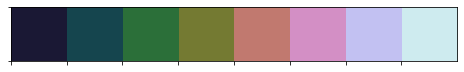

In [9]:
sns.palplot(colo)

In [12]:
def plot_df(df, consts, title):
    fig = plt.figure(figsize=(15, 8))
    sns.set_style('darkgrid')
    sns.lineplot(x='index', y='linear regression', data=df, color=colo[-2], lw=5)
    sns.lineplot(x='index', y='height $\mu m$', data=df, color=colo[2])
    #plt.text(1100, -3, '$ Y_i = {} x  {} $'.format(consts[0], consts[1][0]), fontsize=16)
    plt.legend(['Center Line', 'height $\mu m$'], fontsize=18)
    plt.title(title + '\n $ Y_i = {} x  {} $'.format(consts[0][0], consts[1]), fontsize=25)
    plt.tight_layout()
    plt.close(fig)
    return fig

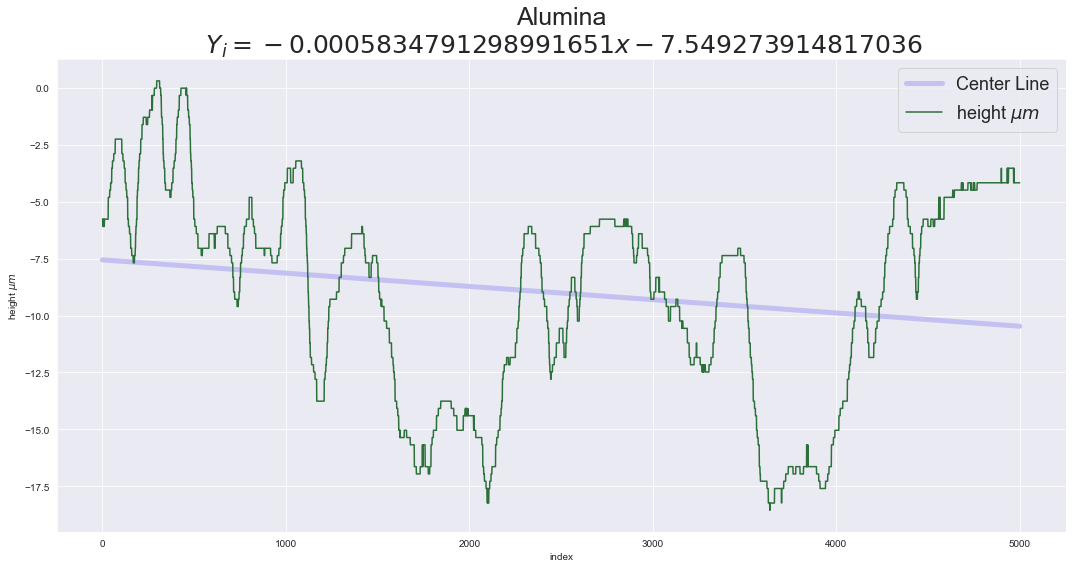

In [13]:
alumina_fig = plot_df(alumina, alumina_consts, 'Alumina')
alumina_fig

In [14]:
inp = input('save fig? y/n')

save fig? y/n y


In [15]:
if inp == 'y':
    alumina_fig.savefig('Alumina.png')
plt.close(alumina_fig)

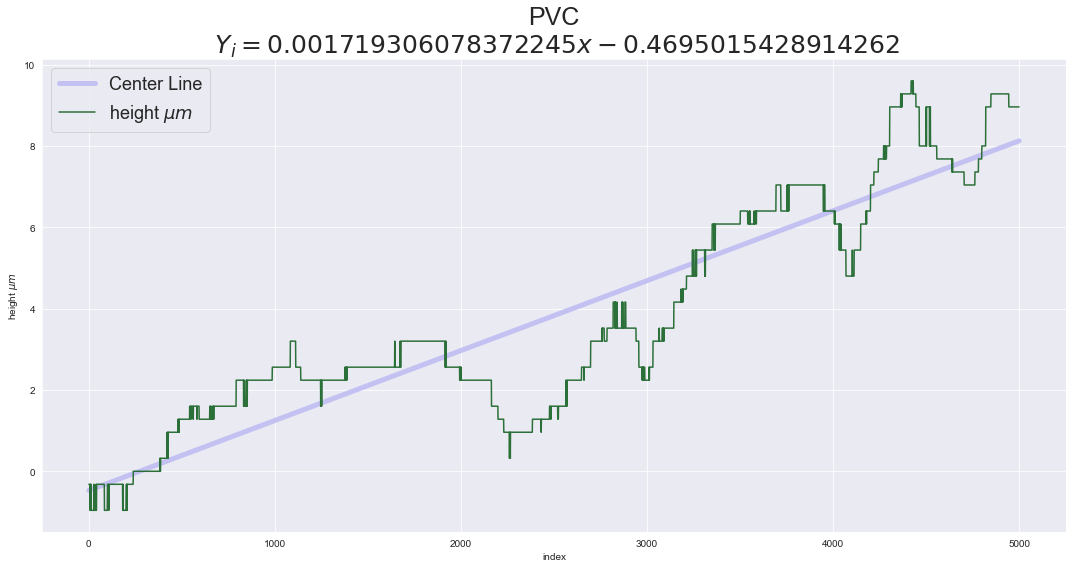

In [16]:
pvc_fig = plot_df(pvc, pvc_consts, 'PVC')
pvc_fig

In [17]:
inp = input('save fig? y/n')

save fig? y/n y


In [18]:
if inp == 'y':
    pvc_fig.savefig('PVC.png')
plt.close(pvc_fig)

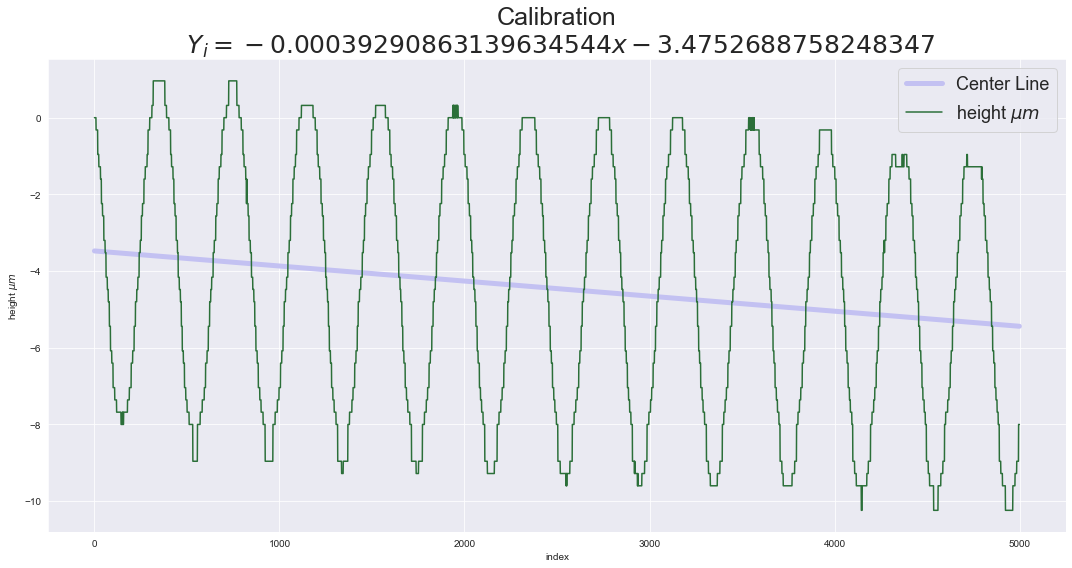

In [19]:
cal_fig = plot_df(cal, cal_consts, 'Calibration')
cal_fig

In [20]:
inp = input('save fig?')

save fig? y


In [21]:
if inp == 'y':
    cal_fig.savefig('calibration.png')
plt.close(cal_fig)

In [22]:
from IPython.display import Markdown as md
md("Values for Calibration: $ R_a $ = {}, $ R_q $ = {}, $ R_z $ = {}".format(Ra_cal, Rq_cal, Rz_cal))

Values for Calibration: $ R_a $ = 3.0613950741983644, $ R_q $ = 3.390553283348473, $ R_z $ = 9.600000000000001

In [23]:
md("Values for Alumina: $ R_a $ = {}, $ R_q $ = {}, $ R_z $ = {}".format(Ra_alumina, Rq_alumina, Rz_alumina))

Values for Alumina: $ R_a $ = 3.748392614367242, $ R_q $ = 4.481288604631021, $ R_z $ = 11.839999999999998

In [24]:
md("Values for PVC: $ R_a $ = {}, $ R_q $ = {}, $ R_z $ = {}".format(Ra_pvc, Rq_pvc, Rz_pvc))

Values for PVC: $ R_a $ = 0.9171356488435709, $ R_q $ = 1.1306160717070661, $ R_z $ = 3.7120000000000006

In [25]:
inp = input('save csv files? y/n')

save csv files? y/n y


In [26]:
if inp == 'y':
    alumina.to_csv('Alumina.csv')
    pvc.to_csv('PVC.csv')
    cal.to_csv('calibration.csv')